Input value (fixed-point): 0.0009765625
Output value (float): 1.0


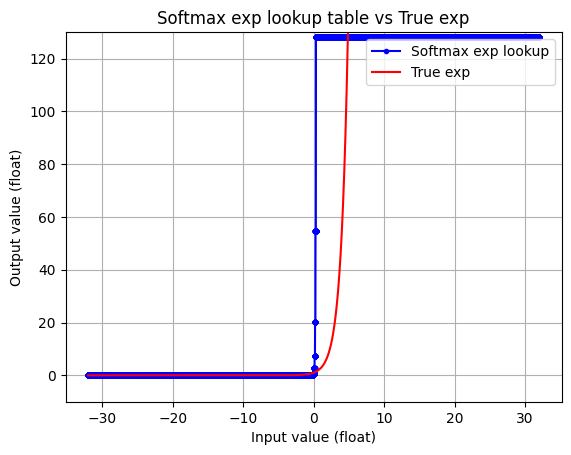

In [2]:
def signed_fixed_to_float(val: int, nfrac: int, nbits: int) -> float:
    """Convert signed fixed-point integer to float."""
    if val & (1 << (nbits - 1)):
        val -= (1 << nbits)
    return val / (1 << nfrac)

def load_rom_from_dat(filepath: str) -> list[int]:
    """Load ROM from .dat file where each line is a signed integer."""
    with open(filepath, 'r') as f:
        return [int(line.strip(), 16) for line in f.readlines()]

def lookup(input_val: int, rom: list[int], shift_amount=6) -> float:
    """
    input_val: signed 16_10 fixed-point integer
    rom: list of 1024 signed 18_10 fixed-point values
    """
    # Step 1: Shift to convert 16_10 -> 10_4 signed fixed-point
    signed_addr = input_val >> shift_amount

    # Step 2: Reinterpret signed 10-bit as unsigned index
    rom_index = signed_addr & 0x3FF

    # Step 3: Lookup in ROM and convert to float
    rom_val = rom[rom_index]
    return signed_fixed_to_float(rom_val, nfrac=10, nbits=18)


filepath = "/home/donovan/code/research/hls4ml/waiz-khan-files/model_7/16_10_prj/myproject_prj/solution1/impl/verilog/softmax_stable_ap_fixed_ap_fixed_16_10_5_3_0_softmax_config16_s_exp_table1_rom.dat"

rom = load_rom_from_dat(filepath)
# Example input value
input_val = 0x0001
# Perform lookup directly with the integer input value
output_val = lookup(input_val, rom, 6)
print(f"Input value (fixed-point): {signed_fixed_to_float(input_val, nfrac=10, nbits=16)}")
print(f"Output value (float): {output_val}")



# Now plot this for all possible values representable by signed 16_10
# also include the real exp function for comparison
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-32768, 32768)  # Adjusted range to include all representable values
y = np.array([lookup(val, rom) for val in x])

# Convert fixed-point x values to float for comparison
x_float = x / (1 << 10)
y_true = np.exp(x_float)  # True exponential values

plt.plot(x_float, y, label="Softmax exp lookup", color="blue", marker=".")
plt.plot(x_float, y_true, label="True exp", color="red")
plt.legend()
plt.title("Softmax exp lookup table vs True exp")
plt.xlabel("Input value (float)")
plt.ylabel("Output value (float)")
plt.ylim(-10, 130)
plt.grid()
plt.show()

In [80]:
fixed = "045C"
output = "40031"
print(f"Fixed point value in float: {signed_fixed_to_float(int(fixed, 16), nfrac=10, nbits=16)}")
# exponentiate using table
print(f"Exponentiated value using table: {lookup(int("10", 16), rom)}")
print(f"model sim output: {signed_fixed_to_float(int(output, 16), nfrac=10, nbits=18)}")

SyntaxError: f-string: unmatched '(' (2976607316.py, line 5)

In [21]:
number = 127.9990234375 * 2 + 0.0498046875
print(f"Number: {number}")

Number: 256.0478515625


In [79]:
temp_sum = "40031"
temp_sum = signed_fixed_to_float(int(temp_sum, 16), nfrac=10, nbits=18)
print(f"temp_sum: {temp_sum}")
exp_sum = "14"

exp_sum = signed_fixed_to_float(int(exp_sum, 16), nfrac=2, nbits=10)
print(f"exp_sum: {exp_sum}")

temp_sum: 256.0478515625
exp_sum: 5.0


In [42]:
sixteen_bit_fixed = "08"
print(f"16-bit fixed point value: {signed_fixed_to_float(int(sixteen_bit_fixed, 16), nfrac=10, nbits=18)}")

16-bit fixed point value: 0.0078125


In [68]:
print(127.9990234375 * 0.0078125)

0.9999923706054688


## Invert Table

In [45]:
inv_filepath = '/home/donovan/code/research/hls4ml/waiz-khan-files/model_7/16_10_prj/myproject_prj/solution1/impl/verilog/softmax_stable_ap_fixed_ap_fixed_16_10_5_3_0_softmax_config16_s_invert_table2_rom.dat'
inv_rom = load_rom_from_dat(inv_filepath)
# Example input value

invert_index = "1ff"
invert_index = int(invert_index, 16)
print(f"Lookup index: {invert_index}")
invert = lookup(invert_index, inv_rom, shift_amount=0)
print(f"Lookup value: {invert}")

Lookup index: 511
Lookup value: 0.0078125


In [61]:
lookup(2 << 10, inv_rom, shift_amount=8)

0.5

/tmp/ipykernel_782/2584941588.py:6: RuntimeWarning: divide by zero encountered in divide
  y_true = 1 / x_float  # True inverse values


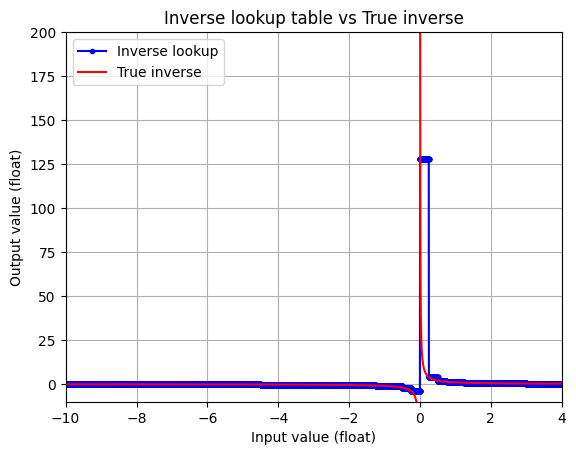

In [64]:
# x = np.arange(-32768, 32768)  # Adjusted range to include all representable values
y_inv = np.array([lookup(val, inv_rom, shift_amount=8) for val in x])

# Convert fixed-point x values to float for comparison
x_float = x / (1 << 10)
y_true = 1 / x_float  # True inverse values

plt.plot(x_float, y_inv, label="Inverse lookup", color="blue", marker=".")
plt.plot(x_float, y_true, label="True inverse", color="red")
plt.legend()
plt.title("Inverse lookup table vs True inverse")
plt.xlabel("Input value (float)")
plt.ylabel("Output value (float)")
plt.ylim(-10, 200)
plt.xlim(-10, 4)
plt.grid()
plt.show()

In [66]:
number = "FF59"
print(f"16-bit fixed point value: {signed_fixed_to_float(int(number, 16), nfrac=10, nbits=16)}")

16-bit fixed point value: -0.1630859375
